 Load & Combine All CSV Files

In [2]:
# Step 1: Load & Merge UNSW-NB15 Dataset

import pandas as pd

# === Paths to data files ===
data_files = [
    'UNSW-NB15_1.csv',
    'UNSW-NB15_2.csv',
    'UNSW-NB15_3.csv',
    'UNSW-NB15_4.csv'
]
feature_file = 'NUSW-NB15_features.csv'

# === Load feature names (from 2nd column), no need to append anything ===
features_df = pd.read_csv(feature_file, encoding='ISO-8859-1')
column_names = features_df.iloc[:, 1].tolist()  # 2nd column has names

# Confirm column count
print(f"✅ Columns extracted from feature file: {len(column_names)}")

# === Load and merge 4 data files ===
merged_dataframes = []
for file in data_files:
    df = pd.read_csv(file, header=None)  # No header in source files
    merged_dataframes.append(df)

# Combine into one DataFrame
merged_df = pd.concat(merged_dataframes, ignore_index=True)

# Confirm column count matches
print(f"🧪 Columns in merged data before assignment: {merged_df.shape[1]}")

# === Assign column names ===
if len(column_names) == merged_df.shape[1]:
    merged_df.columns = column_names
    print("🎉 Column names successfully assigned!")
else:
    raise ValueError(f"❌ Column count mismatch: {len(column_names)} names vs {merged_df.shape[1]} columns in data.")

# === Preview result ===
print("📋 Merged DataFrame shape:", merged_df.shape)
print("📝 Sample data:")
print(merged_df.head(3))


✅ Columns extracted from feature file: 49


C:\Users\HP\AppData\Local\Temp\ipykernel_356276\2982573720.py:24: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, header=None)  # No header in source files
C:\Users\HP\AppData\Local\Temp\ipykernel_356276\2982573720.py:24: DtypeWarning: Columns (3,39,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, header=None)  # No header in source files


🧪 Columns in merged data before assignment: 49
🎉 Column names successfully assigned!
📋 Merged DataFrame shape: (2540047, 49)
📝 Sample data:
        srcip  sport          dstip dsport proto state       dur  sbytes  \
0  59.166.0.0   1390  149.171.126.6     53   udp   CON  0.001055     132   
1  59.166.0.0  33661  149.171.126.9   1024   udp   CON  0.036133     528   
2  59.166.0.6   1464  149.171.126.7     53   udp   CON  0.001119     146   

   dbytes  sttl  ...  ct_ftp_cmd  ct_srv_src  ct_srv_dst ct_dst_ltm  \
0     164    31  ...           0           3           7          1   
1     304    31  ...           0           2           4          2   
2     178    31  ...           0          12           8          1   

   ct_src_ ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0            3                 1                 1               1   
1            3                 1                 1               2   
2            2                 2                 1          

 Data Cleaning

In [3]:
import pandas as pd

# === Step 2: Clean the Dataset (Revised) ===

# Columns to drop (excluding proto, state, service now)
columns_to_drop = [
    'id', 'srcip', 'sport', 'dstip', 'dsport',  # IPs and ports
    'Label'                                     # We use multiclass `attack_cat`, not binary `label`
]

df_cleaned = merged_df.drop(columns=columns_to_drop, errors='ignore')
print(f"🧹 Dropped columns: {columns_to_drop}")
print(f"✅ Shape after column drop: {df_cleaned.shape}")

# === Check for Duplicate Rows ===
duplicate_count = df_cleaned.duplicated().sum()
print(f"📦 Duplicate rows found: {duplicate_count}")

# Optionally, show duplicate samples (first 5 if too many)
if duplicate_count > 0:
    print("🔍 Sample duplicate rows:")
    display(df_cleaned[df_cleaned.duplicated()].head())

# === Check for Missing or Infinite Values ===
# Replace inf with NaN first for consistency
df_cleaned.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Count nulls per column
null_summary = df_cleaned.isna().sum()
total_nulls = null_summary.sum()

print(f"🧯 Total Null Values Found: {total_nulls}")
print("🔍 Null value breakdown (columns with nulls only):")
print(null_summary[null_summary > 0])

# === Output shape and status ===
print(f"📐 Final shape before removing duplicates/nulls: {df_cleaned.shape}")


🧹 Dropped columns: ['id', 'srcip', 'sport', 'dstip', 'dsport', 'Label']
✅ Shape after column drop: (2540047, 44)
📦 Duplicate rows found: 482497
🔍 Sample duplicate rows:


,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat
10,arp,INT,0.000000,46,0,0,0,0,0,-,...,0.0,0,2,2,2,2,2,2,2,NaN
11,arp,INT,0.000000,46,0,0,0,0,0,-,...,0.0,0,2,2,2,2,2,2,2,NaN
12,arp,INT,0.000000,46,0,0,0,0,0,-,...,0.0,0,2,2,2,2,2,2,2,NaN
72,udp,CON,0.001118,132,164,31,29,0,0,dns,...,0.0,0,12,8,5,3,3,2,2,NaN
121,ospf,INT,50.004337,384,0,1,0,0,0,-,...,0.0,0,2,4,4,2,2,4,2,NaN


🧯 Total Null Values Found: 4996788
🔍 Null value breakdown (columns with nulls only):
ct_flw_http_mthd    1348145
is_ftp_login        1429879
attack_cat          2218764
dtype: int64
📐 Final shape before removing duplicates/nulls: (2540047, 44)


In [4]:
# ✅ Print shape before dropping duplicates
before_dup = df_cleaned.shape[0]

# ✅ Drop only fully duplicated rows (all columns including target)
df_cleaned = df_cleaned.drop_duplicates()

# ✅ Print shape after
after_dup = df_cleaned.shape[0]

print(f"📦 Duplicate rows removed: {before_dup - after_dup}")
print(f"✅ Shape after duplicate removal: {df_cleaned.shape}")


📦 Duplicate rows removed: 482497
✅ Shape after duplicate removal: (2057550, 44)


In [5]:
# === Step: Check for Nulls in Rows ===

# 1. Total number of rows with at least one null
rows_with_nulls = df_cleaned[df_cleaned.isnull().any(axis=1)]
null_row_count = rows_with_nulls.shape[0]

print(f"🔍 Total rows with at least one NULL: {null_row_count}")

# 2. Preview some rows with nulls
print("\n🧪 Sample rows with NULL values:")
display(rows_with_nulls.head())  # or use print(rows_with_nulls.head()) if not in Jupyter


🔍 Total rows with at least one NULL: 2043312

🧪 Sample rows with NULL values:


,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat
0,udp,CON,0.001055,132,164,31,29,0,0,dns,...,0.0,0,3,7,1,3,1,1,1,NaN
1,udp,CON,0.036133,528,304,31,29,0,0,-,...,0.0,0,2,4,2,3,1,1,2,NaN
2,udp,CON,0.001119,146,178,31,29,0,0,dns,...,0.0,0,12,8,1,2,2,1,1,NaN
3,udp,CON,0.001209,132,164,31,29,0,0,dns,...,0.0,0,6,9,1,1,1,1,1,NaN
4,udp,CON,0.001169,146,178,31,29,0,0,dns,...,0.0,0,7,9,1,1,1,1,1,NaN


In [6]:
# Drop duplicates based on input features only
df_cleaned = df_cleaned.drop_duplicates(subset=[col for col in df_cleaned.columns if col != 'attack_cat'])
print(f"📦 Shape after dropping duplicates based on input features: {df_cleaned.shape}")


📦 Shape after dropping duplicates based on input features: (2046657, 44)


In [7]:
from sklearn.preprocessing import LabelEncoder

# Target column
y = df_cleaned['attack_cat']

# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Optional: Show class mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("🎯 Attack Category Label Mapping:")
print(label_mapping)


🎯 Attack Category Label Mapping:
{' Fuzzers': np.int64(0), ' Fuzzers ': np.int64(1), ' Reconnaissance ': np.int64(2), ' Shellcode ': np.int64(3), 'Analysis': np.int64(4), 'Backdoor': np.int64(5), 'Backdoors': np.int64(6), 'DoS': np.int64(7), 'Exploits': np.int64(8), 'Generic': np.int64(9), 'Reconnaissance': np.int64(10), 'Shellcode': np.int64(11), 'Worms': np.int64(12), nan: np.int64(13)}


Encode Target & Categorical Columns

In [8]:
# Assuming your cleaned DataFrame is called df_cleaned

# Separate features (X) and target (y)
X = df_cleaned.drop(columns=['attack_cat'])
y = df_cleaned['attack_cat']

# Now you can safely print column names
print("🧪 Available columns in X:")
print(X.columns.tolist())


🧪 Available columns in X:
['proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']


In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1. Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
print("🔍 Categorical columns before encoding:", categorical_cols)

# 2. Convert all categorical columns to string (to avoid mixed types)
X[categorical_cols] = X[categorical_cols].astype(str)

# 3. Define transformer: OneHot for categorical, passthrough for numeric
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

# 4. Apply transformations
X_encoded = preprocessor.fit_transform(X)

# 5. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)




🔍 Categorical columns before encoding: ['proto', 'state', 'service', 'ct_ftp_cmd']


In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# === Step 1: Clean column names ===
df_encoded = df_cleaned.copy()
df_encoded.columns = df_encoded.columns.str.strip().str.lower().str.replace(' ', '_')

# === Step 2: Encode Target Column ===
le = LabelEncoder()
df_encoded['attack_cat_encoded'] = le.fit_transform(df_encoded['attack_cat'])

# Save mapping for UI or analysis
attack_cat_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("🎯 Attack Category Encoding:", attack_cat_mapping)

# === Step 3: Split Features and Target ===
X = df_encoded.drop(columns=['attack_cat', 'attack_cat_encoded'])  # Features
y = df_encoded['attack_cat_encoded']  # Target

# === Step 4: Detect and fix categorical columns ===
categorical_cols = X.select_dtypes(include='object').columns.tolist()
print("🔍 Detected categorical columns:", categorical_cols)

# 🔧 Fix for encoder error: force all categorical columns to string type
X[categorical_cols] = X[categorical_cols].astype(str)

# === Step 5: Define ColumnTransformer for encoding ===
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'  # Keep numerical columns
)

# === Step 6: Apply the transformer ===
X_encoded = preprocessor.fit_transform(X)

# === Step 7: Retrieve final column names ===
ohe = preprocessor.named_transformers_['cat']
encoded_feature_names = ohe.get_feature_names_out(categorical_cols)

# Get numerical columns that were passed through
numerical_cols = [col for col in X.columns if col not in categorical_cols]
final_feature_names = list(encoded_feature_names) + numerical_cols

# === Step 8: Convert to DataFrame ===
X_encoded_df = pd.DataFrame(X_encoded, columns=final_feature_names)

# === Step 9: Align indexes ===
X_encoded_df.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# ✅ Final Output Summary
print(f"✅ Target shape: {y.shape}")
print("📌 Sample encoded features:")
print(X_encoded_df.head())


🎯 Attack Category Encoding: {' Fuzzers': np.int64(0), ' Fuzzers ': np.int64(1), ' Reconnaissance ': np.int64(2), ' Shellcode ': np.int64(3), 'Analysis': np.int64(4), 'Backdoor': np.int64(5), 'Backdoors': np.int64(6), 'DoS': np.int64(7), 'Exploits': np.int64(8), 'Generic': np.int64(9), 'Reconnaissance': np.int64(10), 'Shellcode': np.int64(11), 'Worms': np.int64(12), nan: np.int64(13)}
🔍 Detected categorical columns: ['proto', 'state', 'service', 'ct_ftp_cmd']
✅ Target shape: (2046657,)
📌 Sample encoded features:
   proto_3pc  proto_a/n  proto_aes-sp3-d  proto_any  proto_argus  proto_aris  \
0        0.0        0.0              0.0        0.0          0.0         0.0   
1        0.0        0.0              0.0        0.0          0.0         0.0   
2        0.0        0.0              0.0        0.0          0.0         0.0   
3        0.0        0.0              0.0        0.0          0.0         0.0   
4        0.0        0.0              0.0        0.0          0.0         0.0   

  

Import the scaler

In [25]:
from sklearn.preprocessing import StandardScaler


Apply scaling

In [26]:
# Initialize scaler
scaler = StandardScaler()

# Apply scaler to all columns (they are all numeric now)
X_scaled = scaler.fit_transform(X_encoded_df)

# Optional: Convert back to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded_df.columns)

# Preview result
print("📊 Scaled feature preview:")
print(X_scaled_df.head())


📊 Scaled feature preview:
   proto_3pc  proto_a/n  proto_aes-sp3-d  proto_any  proto_argus  proto_aris  \
0  -0.001849  -0.001849        -0.001849  -0.003203    -0.001849   -0.001849   
1  -0.001849  -0.001849        -0.001849  -0.003203    -0.001849   -0.001849   
2  -0.001849  -0.001849        -0.001849  -0.003203    -0.001849   -0.001849   
3  -0.001849  -0.001849        -0.001849  -0.003203    -0.001849   -0.001849   
4  -0.001849  -0.001849        -0.001849  -0.003203    -0.001849   -0.001849   

   proto_arp  proto_ax.25  proto_bbn-rcc  proto_bna  ...  ct_state_ttl  \
0  -0.055744    -0.001849      -0.001849  -0.001849  ...     -0.221193   
1  -0.055744    -0.001849      -0.001849  -0.001849  ...     -0.221193   
2  -0.055744    -0.001849      -0.001849  -0.001849  ...     -0.221193   
3  -0.055744    -0.001849      -0.001849  -0.001849  ...     -0.221193   
4  -0.055744    -0.001849      -0.001849  -0.001849  ...     -0.221193   

   ct_flw_http_mthd  is_ftp_login  ct_srv_src  c

Feature Selection using SelectKBest (Top 40 Features)

In [28]:
from sklearn.feature_selection import SelectKBest, f_classif


In [ ]:
from sklearn.impute import SimpleImputer

# Fill NaNs with median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_scaled_df)

# Feature selection
selector = SelectKBest(score_func=f_classif, k=40)
X_selected = selector.fit_transform(X_imputed, y_encoded)

selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X_scaled_df.columns[selected_feature_indices].tolist()

print("✅ Selected Top 40 Features:")
print(selected_feature_names)


Apply SelectKBest to the scaled features

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 40 features using ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=40)
X_selected = selector.fit_transform(X_scaled_df, y_encoded)

# Get feature names
mask = selector.get_support()
selected_features = X_scaled_df.columns[mask]
print("🏆 Selected Top 40 Features:")
print(selected_features.tolist())

# Final dataframe
X_final = pd.DataFrame(X_selected, columns=selected_features)
print("✅ X_final shape:", X_final.shape)


🏆 Selected Top 40 Features:
['service_-', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_pop3', 'service_smtp', 'dur', 'sttl', 'dttl', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'sjit', 'djit', 'stime', 'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack', 'ackdat', 'ct_state_ttl', 'ct_flw_http_mthd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src__ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']
✅ X_final shape: (14160, 40)


d:\ONGC_ML\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [43] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\ONGC_ML\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


RandomOverSampler for Balancing

In [25]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Show class distribution before balancing
print("🔍 Class distribution before oversampling:")
print(Counter(y_encoded))

# Initialize oversampler
ros = RandomOverSampler(random_state=42)

# Apply oversampling
X_balanced, y_balanced = ros.fit_resample(X_final, y_encoded)

# Show new class distribution
print("\n✅ Class distribution after oversampling:")
print(Counter(y_balanced))

# Final shapes
print("📦 X_balanced shape:", X_balanced.shape)
print("🎯 y_balanced shape:", y_balanced.shape)


🔍 Class distribution before oversampling:
Counter({np.int64(4): 4026, np.int64(0): 3944, np.int64(5): 2824, np.int64(6): 1740, np.int64(3): 809, np.int64(1): 287, np.int64(2): 283, np.int64(7): 223, np.int64(8): 24})

✅ Class distribution after oversampling:
Counter({np.int64(4): 4026, np.int64(6): 4026, np.int64(3): 4026, np.int64(5): 4026, np.int64(7): 4026, np.int64(0): 4026, np.int64(8): 4026, np.int64(2): 4026, np.int64(1): 4026})
📦 X_balanced shape: (36234, 40)
🎯 y_balanced shape: (36234,)


In [27]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'attack_cat' column (target)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


✅ 9 Attack Categories:
1. Analysis
2. Backdoor
3. DoS
4. Exploits
5. Fuzzers
6. Generic
7. Reconnaissance
8. Shellcode
9. Worms


C:\Users\HP\AppData\Local\Temp\ipykernel_1097436\2701592588.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_original_names, order=np.unique(y_original_names), palette='coolwarm')
C:\Users\HP\AppData\Local\Temp\ipykernel_1097436\2701592588.py:17: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\ONGC_ML\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


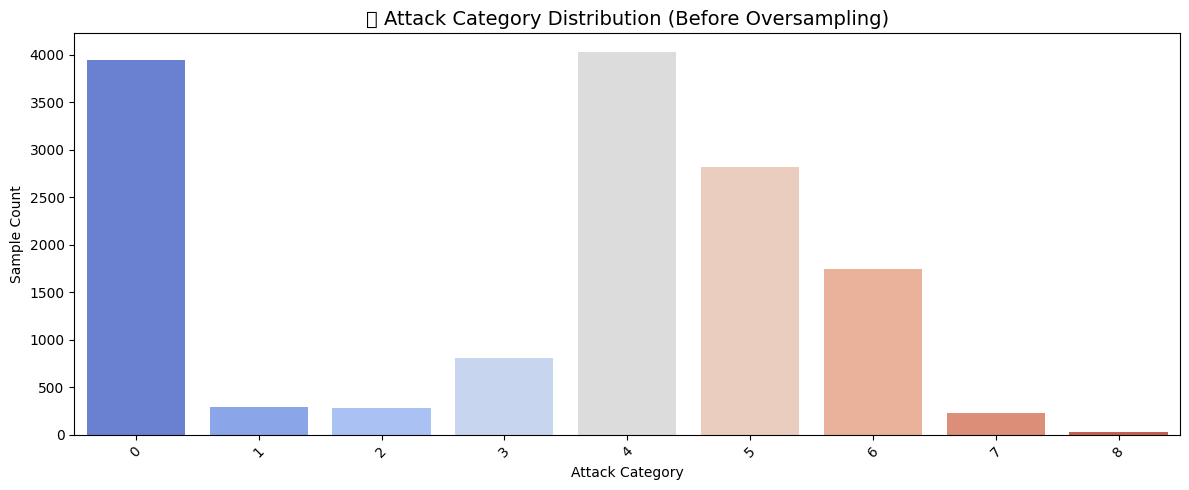

C:\Users\HP\AppData\Local\Temp\ipykernel_1097436\2701592588.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_balanced_names, order=np.unique(y_balanced_names), palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_1097436\2701592588.py:27: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\ONGC_ML\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


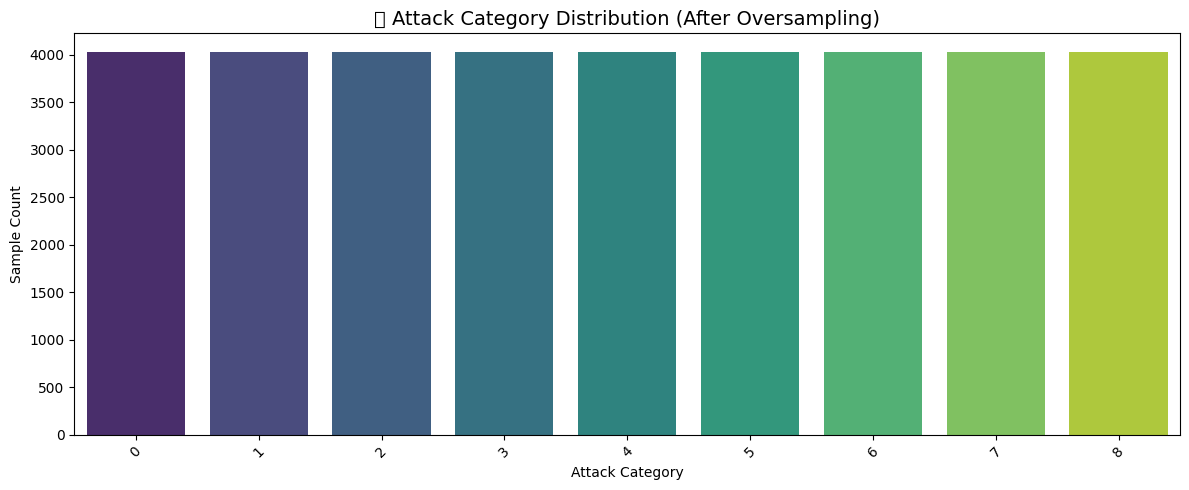

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Convert encoded labels back to original names for better visuals
import numpy as np
y_original_names = label_encoder.inverse_transform(y_encoded)
y_balanced_names = label_encoder.inverse_transform(y_balanced)

# === 1. BEFORE Oversampling ===
plt.figure(figsize=(12, 5))
sns.countplot(x=y_original_names, order=np.unique(y_original_names), palette='coolwarm')
plt.title("📉 Attack Category Distribution (Before Oversampling)", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Attack Category")
plt.ylabel("Sample Count")
plt.tight_layout()
plt.show()

# === 2. AFTER Oversampling ===
plt.figure(figsize=(12, 5))
sns.countplot(x=y_balanced_names, order=np.unique(y_balanced_names), palette='viridis')
plt.title("📈 Attack Category Distribution (After Oversampling)", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Attack Category")
plt.ylabel("Sample Count")
plt.tight_layout()
plt.show()


Train-Test Split
We'll split the balanced dataset (X_balanced_selected, y_balanced) into training and test sets using:

80% for training,

20% for testing,

Stratify=y_balanced (to preserve class distribution),

random_state=42 (for reproducibility).

In [30]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=40)
X_selected = selector.fit_transform(X_scaled_df, y_encoded)


d:\ONGC_ML\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [43] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
d:\ONGC_ML\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [32]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_balanced_selected, y_balanced = ros.fit_resample(X_selected, y_encoded)


In [33]:
from sklearn.model_selection import train_test_split
import numpy as np

# === Train-Test Split (80% Train, 20% Test) ===
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced_selected,
    y_balanced,
    test_size=0.2,
    stratify=y_balanced,
    random_state=42
)

# === Confirm Shapes ===
print(f"✅ X_train shape: {X_train.shape}")
print(f"✅ X_test shape:  {X_test.shape}")
print(f"✅ y_train shape: {y_train.shape}")
print(f"✅ y_test shape:  {y_test.shape}")

# === Confirm Class Distribution ===
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

print("\n📊 Class Distribution in y_train:")
for label, count in zip(unique_train, counts_train):
    print(f"  {label_encoder.inverse_transform([label])[0]}: {count}")

print("\n📊 Class Distribution in y_test:")
for label, count in zip(unique_test, counts_test):
    print(f"  {label_encoder.inverse_transform([label])[0]}: {count}")


✅ X_train shape: (28987, 40)
✅ X_test shape:  (7247, 40)
✅ y_train shape: (28987,)
✅ y_test shape:  (7247,)

📊 Class Distribution in y_train:
  0: 3221
  1: 3221
  2: 3221
  3: 3220
  4: 3221
  5: 3221
  6: 3220
  7: 3221
  8: 3221

📊 Class Distribution in y_test:
  0: 805
  1: 805
  2: 805
  3: 806
  4: 805
  5: 805
  6: 806
  7: 805
  8: 805


Train Multiple Models & Evaluate

 1. Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Train
log_model = LogisticRegression(max_iter=500, solver='liblinear')
log_model.fit(X_train, y_train)

# Predict
log_preds = log_model.predict(X_test)
log_acc = accuracy_score(y_test, log_preds)

# Fix target names
target_names = [str(label) for label in label_encoder.inverse_transform(np.unique(y_test))]

# Report
print("🔹 Logistic Regression")
print(f"✅ Accuracy: {log_acc:.4f}")
print(classification_report(y_test, log_preds, target_names=target_names))


🔹 Logistic Regression
✅ Accuracy: 0.5869
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       805
           1       0.48      0.45      0.46       805
           2       0.40      0.56      0.47       805
           3       0.61      0.06      0.10       806
           4       0.56      0.57      0.56       805
           5       0.96      0.79      0.87       805
           6       0.55      0.65      0.60       806
           7       0.52      0.68      0.59       805
           8       0.69      0.81      0.74       805

    accuracy                           0.59      7247
   macro avg       0.60      0.59      0.57      7247
weighted avg       0.60      0.59      0.57      7247



Train and Evaluate Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# === 1. Initialize the Random Forest model ===
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    max_depth=None,        # Let trees grow fully
    random_state=42,       # For reproducibility
    n_jobs=-1              # Use all processors
)

# === 2. Train the model ===
rf_model.fit(X_train, y_train)

# === 3. Predict on test data ===
rf_preds = rf_model.predict(X_test)

# === 4. Evaluate ===
rf_acc = accuracy_score(y_test, rf_preds)

# === 5. Fix target names to avoid TypeError in classification_report ===
target_names = [str(label) for label in label_encoder.inverse_transform(np.unique(y_test))]

# === 6. Display results ===
print("🌲 Random Forest Classifier")
print(f"✅ Accuracy: {rf_acc:.4f}")
print(classification_report(y_test, rf_preds, target_names=target_names))


🌲 Random Forest Classifier
✅ Accuracy: 0.8408
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       805
           1       0.51      0.62      0.56       805
           2       0.52      0.59      0.55       805
           3       0.94      0.73      0.82       806
           4       0.89      0.83      0.86       805
           5       0.98      0.90      0.94       805
           6       0.95      0.97      0.96       806
           7       0.98      1.00      0.99       805
           8       1.00      1.00      1.00       805

    accuracy                           0.84      7247
   macro avg       0.86      0.84      0.85      7247
weighted avg       0.86      0.84      0.85      7247



Train and Evaluate XGBoost Classifier

In [38]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# === 1. Initialize the XGBoost model ===
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    use_label_encoder=False,
    eval_metric='mlogloss',  # multiclass objective
    random_state=42,
    verbosity=0
)

# === 2. Train the model ===
xgb_model.fit(X_train, y_train)

# === 3. Predict on test data ===
xgb_preds = xgb_model.predict(X_test)

# === 4. Evaluate ===
xgb_acc = accuracy_score(y_test, xgb_preds)

# === 5. Fix target names for classification report ===
target_names = [str(label) for label in label_encoder.inverse_transform(np.unique(y_test))]

# === 6. Display results ===
print("⚡ XGBoost Classifier")
print(f"✅ Accuracy: {xgb_acc:.4f}")
print(classification_report(y_test, xgb_preds, target_names=target_names))


⚡ XGBoost Classifier
✅ Accuracy: 0.8110
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       805
           1       0.50      0.64      0.56       805
           2       0.51      0.56      0.54       805
           3       0.85      0.59      0.70       806
           4       0.83      0.73      0.78       805
           5       0.98      0.90      0.94       805
           6       0.92      0.96      0.94       806
           7       0.90      1.00      0.95       805
           8       1.00      1.00      1.00       805

    accuracy                           0.81      7247
   macro avg       0.83      0.81      0.81      7247
weighted avg       0.83      0.81      0.81      7247



Train and Evaluate K-Nearest Neighbors (KNN)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# === 1. Initialize KNN model ===
knn_model = KNeighborsClassifier(
    n_neighbors=5,  # You can tune this later
    weights='uniform',  # All neighbors have equal weight
    metric='minkowski',  # Default: Euclidean distance
    n_jobs=-1           # Use all processors
)

# === 2. Train the model ===
knn_model.fit(X_train, y_train)

# === 3. Predict on test data ===
knn_preds = knn_model.predict(X_test)

# === 4. Evaluate ===
knn_acc = accuracy_score(y_test, knn_preds)

# === 5. Fix target names for classification report ===
target_names = [str(label) for label in label_encoder.inverse_transform(np.unique(y_test))]

# === 6. Display results ===
print("📍 K-Nearest Neighbors (KNN)")
print(f"✅ Accuracy: {knn_acc:.4f}")
print(classification_report(y_test, knn_preds, target_names=target_names))


📍 K-Nearest Neighbors (KNN)
✅ Accuracy: 0.7494
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       805
           1       0.49      0.65      0.56       805
           2       0.52      0.53      0.53       805
           3       0.64      0.67      0.65       806
           4       0.74      0.52      0.61       805
           5       0.97      0.82      0.89       805
           6       0.78      0.74      0.76       806
           7       0.90      1.00      0.95       805
           8       0.97      1.00      0.99       805

    accuracy                           0.75      7247
   macro avg       0.76      0.75      0.75      7247
weighted avg       0.76      0.75      0.75      7247



📊 Model Comparison:
                     Accuracy
Random Forest        0.840762
K-Nearest Neighbors  0.749414
Logistic Regression  0.586864


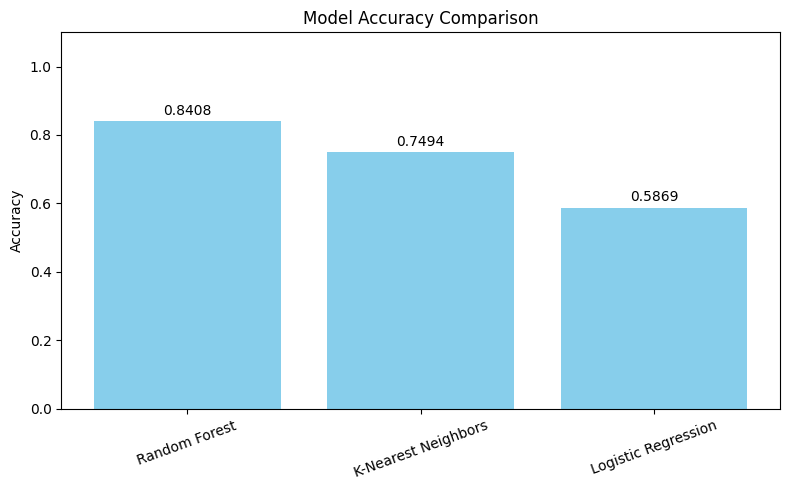

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# === Collect all model accuracies ===
model_scores = {
    'Logistic Regression': log_acc,
    'Random Forest': rf_acc,
    'K-Nearest Neighbors': knn_acc
}

# === Convert to DataFrame for easy comparison ===
comparison_df = pd.DataFrame.from_dict(model_scores, orient='index', columns=['Accuracy'])
comparison_df = comparison_df.sort_values(by='Accuracy', ascending=False)

# === Display as table ===
print("📊 Model Comparison:")
print(comparison_df)

# === Plot bar chart ===
plt.figure(figsize=(8, 5))
bars = plt.bar(comparison_df.index, comparison_df['Accuracy'], color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

plt.ylim(0, 1.1)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


save the best mobel

In [41]:
import joblib

# Save the trained Random Forest model to a .pkl file
joblib.dump(rf_model, 'best_attack_classifier_model.pkl')

print("✅ Model saved as 'best_attack_classifier_model.pkl'")


✅ Model saved as 'best_attack_classifier_model.pkl'


In [44]:
selected_feature_names = X_scaled_df.columns[selector.get_support()].tolist()
joblib.dump(selected_feature_names, "selected_features.pkl")


['selected_features.pkl']

In [47]:
# Save your trained model, label encoder, and selected feature names
import joblib


joblib.dump(selected_feature_names, "selected_features.pkl")  # must be ordered list of top 40 features


['selected_features.pkl']